In [1]:
import numpy as np
import pandas as pd
import os
import json
from sklearn.model_selection  import train_test_split

## load preprocessed data

In [2]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'

TRAIN_Q1_DATA_FILE = 'train_q1.npy'
TRAIN_Q2_DATA_FILE = 'train_q2.npy'
TRAIN_LABEL_DATA_FILE = 'train_label.npy'


# 훈련 데이터 가져오는 부분이다.
train_q1_data = np.load(open(DATA_IN_PATH + TRAIN_Q1_DATA_FILE, 'rb'))
train_q2_data = np.load(open(DATA_IN_PATH + TRAIN_Q2_DATA_FILE, 'rb'))
train_labels = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA_FILE, 'rb'))

In [3]:
train_input = np.stack((train_q1_data, train_q2_data), axis=1) 

In [4]:
train_input[0]

array([[  30,    5,  267,  160, 1084,   28,  163,  884, 3266,   20,  311,
          31,   64,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  30,    5,  267,  311,   28,  163,  884,    3, 1174,   20,  311,
          31,  160,  813,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [5]:
print(train_q1_data.shape)

(298526, 31)


In [6]:
print(train_input.shape)

(298526, 2, 31)


## Train Eval split

In [7]:
train_input, eval_input, train_label, eval_label = train_test_split(train_input, train_labels, test_size=0.2, random_state=4242)

In [8]:
import xgboost as xgb

In [9]:
# train_input => (238820, 2, 31)
# train_input.sum(axis=1) => (238820, 31)

train_data = xgb.DMatrix(train_input.sum(axis=1), label=train_label) # 학습 데이터 읽어 오기
eval_data = xgb.DMatrix(eval_input.sum(axis=1), label=eval_label) # 평가 데이터 읽어 오기

data_list = [(train_data, 'train'), (eval_data, 'valid')]

In [14]:
params = {
    'objective':'binary:logistic',
    'eval_metric':'rmse',  
} # 인자를 통해 XGB모델에 넣어 주자 
#params['objective'] = 'binary:logistic' # 로지스틱 예측을 통해서 
#params['eval_metric'] = 'rmse' # root mean square error를 사용  

bst = xgb.train(params, train_data, num_boost_round = 2500, evals = data_list, early_stopping_rounds=100)

[0]	train-rmse:0.48368	valid-rmse:0.48412
[1]	train-rmse:0.47347	valid-rmse:0.47413
[2]	train-rmse:0.46672	valid-rmse:0.46758
[3]	train-rmse:0.46219	valid-rmse:0.46335
[4]	train-rmse:0.45848	valid-rmse:0.45989
[5]	train-rmse:0.45584	valid-rmse:0.45750
[6]	train-rmse:0.45383	valid-rmse:0.45563
[7]	train-rmse:0.45231	valid-rmse:0.45434
[8]	train-rmse:0.45068	valid-rmse:0.45291
[9]	train-rmse:0.44923	valid-rmse:0.45154
[10]	train-rmse:0.44784	valid-rmse:0.45021
[11]	train-rmse:0.44560	valid-rmse:0.44803
[12]	train-rmse:0.44359	valid-rmse:0.44611
[13]	train-rmse:0.44299	valid-rmse:0.44565
[14]	train-rmse:0.44242	valid-rmse:0.44517
[15]	train-rmse:0.44178	valid-rmse:0.44476
[16]	train-rmse:0.44096	valid-rmse:0.44412
[17]	train-rmse:0.44033	valid-rmse:0.44363
[18]	train-rmse:0.43872	valid-rmse:0.44221
[19]	train-rmse:0.43822	valid-rmse:0.44185
[20]	train-rmse:0.43794	valid-rmse:0.44164
[21]	train-rmse:0.43762	valid-rmse:0.44141
[22]	train-rmse:0.43690	valid-rmse:0.44073
[23]	train-rmse:0.436

[189]	train-rmse:0.40160	valid-rmse:0.42397
[190]	train-rmse:0.40145	valid-rmse:0.42395
[191]	train-rmse:0.40141	valid-rmse:0.42395
[192]	train-rmse:0.40114	valid-rmse:0.42378
[193]	train-rmse:0.40087	valid-rmse:0.42373
[194]	train-rmse:0.40085	valid-rmse:0.42372
[195]	train-rmse:0.40081	valid-rmse:0.42371
[196]	train-rmse:0.40070	valid-rmse:0.42370
[197]	train-rmse:0.40058	valid-rmse:0.42367
[198]	train-rmse:0.40056	valid-rmse:0.42366
[199]	train-rmse:0.40054	valid-rmse:0.42366
[200]	train-rmse:0.40034	valid-rmse:0.42363
[201]	train-rmse:0.40014	valid-rmse:0.42360
[202]	train-rmse:0.40013	valid-rmse:0.42359
[203]	train-rmse:0.39994	valid-rmse:0.42357
[204]	train-rmse:0.39976	valid-rmse:0.42351
[205]	train-rmse:0.39971	valid-rmse:0.42348
[206]	train-rmse:0.39963	valid-rmse:0.42348
[207]	train-rmse:0.39945	valid-rmse:0.42342
[208]	train-rmse:0.39924	valid-rmse:0.42338
[209]	train-rmse:0.39919	valid-rmse:0.42336
[210]	train-rmse:0.39893	valid-rmse:0.42329
[211]	train-rmse:0.39873	valid-r

[376]	train-rmse:0.37982	valid-rmse:0.41896
[377]	train-rmse:0.37955	valid-rmse:0.41887
[378]	train-rmse:0.37946	valid-rmse:0.41885
[379]	train-rmse:0.37926	valid-rmse:0.41881
[380]	train-rmse:0.37918	valid-rmse:0.41879
[381]	train-rmse:0.37903	valid-rmse:0.41879
[382]	train-rmse:0.37887	valid-rmse:0.41879
[383]	train-rmse:0.37876	valid-rmse:0.41877
[384]	train-rmse:0.37872	valid-rmse:0.41876
[385]	train-rmse:0.37872	valid-rmse:0.41876
[386]	train-rmse:0.37870	valid-rmse:0.41877
[387]	train-rmse:0.37862	valid-rmse:0.41877
[388]	train-rmse:0.37857	valid-rmse:0.41876
[389]	train-rmse:0.37832	valid-rmse:0.41870
[390]	train-rmse:0.37812	valid-rmse:0.41866
[391]	train-rmse:0.37801	valid-rmse:0.41864
[392]	train-rmse:0.37787	valid-rmse:0.41862
[393]	train-rmse:0.37773	valid-rmse:0.41864
[394]	train-rmse:0.37749	valid-rmse:0.41863
[395]	train-rmse:0.37735	valid-rmse:0.41861
[396]	train-rmse:0.37719	valid-rmse:0.41858
[397]	train-rmse:0.37718	valid-rmse:0.41858
[398]	train-rmse:0.37716	valid-r

[563]	train-rmse:0.36157	valid-rmse:0.41648
[564]	train-rmse:0.36152	valid-rmse:0.41650
[565]	train-rmse:0.36143	valid-rmse:0.41647
[566]	train-rmse:0.36128	valid-rmse:0.41642
[567]	train-rmse:0.36124	valid-rmse:0.41641
[568]	train-rmse:0.36114	valid-rmse:0.41638
[569]	train-rmse:0.36102	valid-rmse:0.41634
[570]	train-rmse:0.36085	valid-rmse:0.41630
[571]	train-rmse:0.36066	valid-rmse:0.41628
[572]	train-rmse:0.36055	valid-rmse:0.41626
[573]	train-rmse:0.36048	valid-rmse:0.41625
[574]	train-rmse:0.36036	valid-rmse:0.41623
[575]	train-rmse:0.36031	valid-rmse:0.41621
[576]	train-rmse:0.36018	valid-rmse:0.41624
[577]	train-rmse:0.36001	valid-rmse:0.41624
[578]	train-rmse:0.36000	valid-rmse:0.41624
[579]	train-rmse:0.35998	valid-rmse:0.41624
[580]	train-rmse:0.35993	valid-rmse:0.41623
[581]	train-rmse:0.35980	valid-rmse:0.41621
[582]	train-rmse:0.35967	valid-rmse:0.41622
[583]	train-rmse:0.35945	valid-rmse:0.41619
[584]	train-rmse:0.35930	valid-rmse:0.41619
[585]	train-rmse:0.35913	valid-r

[750]	train-rmse:0.34380	valid-rmse:0.41469
[751]	train-rmse:0.34375	valid-rmse:0.41469
[752]	train-rmse:0.34373	valid-rmse:0.41469
[753]	train-rmse:0.34365	valid-rmse:0.41472
[754]	train-rmse:0.34365	valid-rmse:0.41472
[755]	train-rmse:0.34365	valid-rmse:0.41472
[756]	train-rmse:0.34364	valid-rmse:0.41472
[757]	train-rmse:0.34358	valid-rmse:0.41472
[758]	train-rmse:0.34356	valid-rmse:0.41472
[759]	train-rmse:0.34353	valid-rmse:0.41470
[760]	train-rmse:0.34352	valid-rmse:0.41470
[761]	train-rmse:0.34345	valid-rmse:0.41470
[762]	train-rmse:0.34342	valid-rmse:0.41470
[763]	train-rmse:0.34342	valid-rmse:0.41470
[764]	train-rmse:0.34338	valid-rmse:0.41468
[765]	train-rmse:0.34334	valid-rmse:0.41469
[766]	train-rmse:0.34334	valid-rmse:0.41468
[767]	train-rmse:0.34325	valid-rmse:0.41469
[768]	train-rmse:0.34323	valid-rmse:0.41469
[769]	train-rmse:0.34319	valid-rmse:0.41468
[770]	train-rmse:0.34318	valid-rmse:0.41468
[771]	train-rmse:0.34318	valid-rmse:0.41468
[772]	train-rmse:0.34317	valid-r

[937]	train-rmse:0.33069	valid-rmse:0.41353
[938]	train-rmse:0.33069	valid-rmse:0.41353
[939]	train-rmse:0.33066	valid-rmse:0.41352
[940]	train-rmse:0.33064	valid-rmse:0.41353
[941]	train-rmse:0.33063	valid-rmse:0.41353
[942]	train-rmse:0.33063	valid-rmse:0.41353
[943]	train-rmse:0.33054	valid-rmse:0.41355
[944]	train-rmse:0.33053	valid-rmse:0.41354
[945]	train-rmse:0.33053	valid-rmse:0.41354
[946]	train-rmse:0.33051	valid-rmse:0.41355
[947]	train-rmse:0.33038	valid-rmse:0.41351
[948]	train-rmse:0.33023	valid-rmse:0.41350
[949]	train-rmse:0.33011	valid-rmse:0.41350
[950]	train-rmse:0.32998	valid-rmse:0.41350
[951]	train-rmse:0.32985	valid-rmse:0.41347
[952]	train-rmse:0.32978	valid-rmse:0.41346
[953]	train-rmse:0.32976	valid-rmse:0.41347
[954]	train-rmse:0.32974	valid-rmse:0.41347
[955]	train-rmse:0.32974	valid-rmse:0.41347
[956]	train-rmse:0.32966	valid-rmse:0.41349
[957]	train-rmse:0.32959	valid-rmse:0.41347
[958]	train-rmse:0.32958	valid-rmse:0.41347
[959]	train-rmse:0.32946	valid-r

[1121]	train-rmse:0.31751	valid-rmse:0.41250
[1122]	train-rmse:0.31744	valid-rmse:0.41250
[1123]	train-rmse:0.31732	valid-rmse:0.41253
[1124]	train-rmse:0.31715	valid-rmse:0.41250
[1125]	train-rmse:0.31704	valid-rmse:0.41250
[1126]	train-rmse:0.31700	valid-rmse:0.41249
[1127]	train-rmse:0.31685	valid-rmse:0.41248
[1128]	train-rmse:0.31677	valid-rmse:0.41246
[1129]	train-rmse:0.31667	valid-rmse:0.41244
[1130]	train-rmse:0.31664	valid-rmse:0.41245
[1131]	train-rmse:0.31662	valid-rmse:0.41245
[1132]	train-rmse:0.31653	valid-rmse:0.41244
[1133]	train-rmse:0.31651	valid-rmse:0.41244
[1134]	train-rmse:0.31649	valid-rmse:0.41245
[1135]	train-rmse:0.31637	valid-rmse:0.41245
[1136]	train-rmse:0.31624	valid-rmse:0.41240
[1137]	train-rmse:0.31616	valid-rmse:0.41241
[1138]	train-rmse:0.31604	valid-rmse:0.41240
[1139]	train-rmse:0.31603	valid-rmse:0.41240
[1140]	train-rmse:0.31600	valid-rmse:0.41240
[1141]	train-rmse:0.31597	valid-rmse:0.41240
[1142]	train-rmse:0.31581	valid-rmse:0.41242
[1143]	tra

[1304]	train-rmse:0.30613	valid-rmse:0.41211
[1305]	train-rmse:0.30608	valid-rmse:0.41208
[1306]	train-rmse:0.30602	valid-rmse:0.41208
[1307]	train-rmse:0.30601	valid-rmse:0.41208
[1308]	train-rmse:0.30601	valid-rmse:0.41208
[1309]	train-rmse:0.30599	valid-rmse:0.41208
[1310]	train-rmse:0.30591	valid-rmse:0.41204
[1311]	train-rmse:0.30586	valid-rmse:0.41205
[1312]	train-rmse:0.30581	valid-rmse:0.41204
[1313]	train-rmse:0.30571	valid-rmse:0.41205
[1314]	train-rmse:0.30570	valid-rmse:0.41205
[1315]	train-rmse:0.30567	valid-rmse:0.41204
[1316]	train-rmse:0.30553	valid-rmse:0.41203
[1317]	train-rmse:0.30541	valid-rmse:0.41201
[1318]	train-rmse:0.30529	valid-rmse:0.41199
[1319]	train-rmse:0.30527	valid-rmse:0.41199
[1320]	train-rmse:0.30526	valid-rmse:0.41199
[1321]	train-rmse:0.30514	valid-rmse:0.41199
[1322]	train-rmse:0.30500	valid-rmse:0.41201
[1323]	train-rmse:0.30489	valid-rmse:0.41200
[1324]	train-rmse:0.30486	valid-rmse:0.41201
[1325]	train-rmse:0.30485	valid-rmse:0.41200
[1326]	tra

[1487]	train-rmse:0.29486	valid-rmse:0.41154
[1488]	train-rmse:0.29481	valid-rmse:0.41154
[1489]	train-rmse:0.29481	valid-rmse:0.41153
[1490]	train-rmse:0.29469	valid-rmse:0.41153
[1491]	train-rmse:0.29451	valid-rmse:0.41148
[1492]	train-rmse:0.29442	valid-rmse:0.41146
[1493]	train-rmse:0.29433	valid-rmse:0.41148
[1494]	train-rmse:0.29419	valid-rmse:0.41148
[1495]	train-rmse:0.29413	valid-rmse:0.41149
[1496]	train-rmse:0.29406	valid-rmse:0.41147
[1497]	train-rmse:0.29396	valid-rmse:0.41146
[1498]	train-rmse:0.29387	valid-rmse:0.41147
[1499]	train-rmse:0.29380	valid-rmse:0.41147
[1500]	train-rmse:0.29373	valid-rmse:0.41147
[1501]	train-rmse:0.29359	valid-rmse:0.41145
[1502]	train-rmse:0.29343	valid-rmse:0.41142
[1503]	train-rmse:0.29335	valid-rmse:0.41140
[1504]	train-rmse:0.29328	valid-rmse:0.41141
[1505]	train-rmse:0.29317	valid-rmse:0.41145
[1506]	train-rmse:0.29314	valid-rmse:0.41143
[1507]	train-rmse:0.29312	valid-rmse:0.41142
[1508]	train-rmse:0.29311	valid-rmse:0.41143
[1509]	tra

[1670]	train-rmse:0.28282	valid-rmse:0.41126
[1671]	train-rmse:0.28270	valid-rmse:0.41124
[1672]	train-rmse:0.28259	valid-rmse:0.41124
[1673]	train-rmse:0.28256	valid-rmse:0.41123
[1674]	train-rmse:0.28255	valid-rmse:0.41122
[1675]	train-rmse:0.28249	valid-rmse:0.41123
[1676]	train-rmse:0.28248	valid-rmse:0.41123
[1677]	train-rmse:0.28248	valid-rmse:0.41123
[1678]	train-rmse:0.28247	valid-rmse:0.41123
[1679]	train-rmse:0.28243	valid-rmse:0.41125
[1680]	train-rmse:0.28242	valid-rmse:0.41125
[1681]	train-rmse:0.28240	valid-rmse:0.41125
[1682]	train-rmse:0.28230	valid-rmse:0.41125
[1683]	train-rmse:0.28228	valid-rmse:0.41126
[1684]	train-rmse:0.28226	valid-rmse:0.41125
[1685]	train-rmse:0.28225	valid-rmse:0.41126
[1686]	train-rmse:0.28224	valid-rmse:0.41125
[1687]	train-rmse:0.28223	valid-rmse:0.41125
[1688]	train-rmse:0.28215	valid-rmse:0.41126
[1689]	train-rmse:0.28209	valid-rmse:0.41123
[1690]	train-rmse:0.28206	valid-rmse:0.41123
[1691]	train-rmse:0.28204	valid-rmse:0.41124
[1692]	tra

[1853]	train-rmse:0.27298	valid-rmse:0.41072
[1854]	train-rmse:0.27298	valid-rmse:0.41072
[1855]	train-rmse:0.27296	valid-rmse:0.41071
[1856]	train-rmse:0.27291	valid-rmse:0.41074
[1857]	train-rmse:0.27290	valid-rmse:0.41074
[1858]	train-rmse:0.27285	valid-rmse:0.41075
[1859]	train-rmse:0.27284	valid-rmse:0.41076
[1860]	train-rmse:0.27280	valid-rmse:0.41076
[1861]	train-rmse:0.27278	valid-rmse:0.41077
[1862]	train-rmse:0.27276	valid-rmse:0.41076
[1863]	train-rmse:0.27270	valid-rmse:0.41077
[1864]	train-rmse:0.27268	valid-rmse:0.41078
[1865]	train-rmse:0.27267	valid-rmse:0.41078
[1866]	train-rmse:0.27266	valid-rmse:0.41079
[1867]	train-rmse:0.27264	valid-rmse:0.41078
[1868]	train-rmse:0.27263	valid-rmse:0.41079
[1869]	train-rmse:0.27250	valid-rmse:0.41077
[1870]	train-rmse:0.27249	valid-rmse:0.41077
[1871]	train-rmse:0.27243	valid-rmse:0.41077
[1872]	train-rmse:0.27241	valid-rmse:0.41078
[1873]	train-rmse:0.27241	valid-rmse:0.41078
[1874]	train-rmse:0.27241	valid-rmse:0.41078
[1875]	tra

[2036]	train-rmse:0.26438	valid-rmse:0.41056
[2037]	train-rmse:0.26427	valid-rmse:0.41057
[2038]	train-rmse:0.26423	valid-rmse:0.41056
[2039]	train-rmse:0.26413	valid-rmse:0.41055
[2040]	train-rmse:0.26402	valid-rmse:0.41055
[2041]	train-rmse:0.26398	valid-rmse:0.41056
[2042]	train-rmse:0.26393	valid-rmse:0.41054
[2043]	train-rmse:0.26381	valid-rmse:0.41053
[2044]	train-rmse:0.26376	valid-rmse:0.41054
[2045]	train-rmse:0.26367	valid-rmse:0.41054
[2046]	train-rmse:0.26359	valid-rmse:0.41056
[2047]	train-rmse:0.26347	valid-rmse:0.41057
[2048]	train-rmse:0.26343	valid-rmse:0.41056
[2049]	train-rmse:0.26334	valid-rmse:0.41056
[2050]	train-rmse:0.26332	valid-rmse:0.41055
[2051]	train-rmse:0.26329	valid-rmse:0.41055
[2052]	train-rmse:0.26326	valid-rmse:0.41056
[2053]	train-rmse:0.26314	valid-rmse:0.41058
[2054]	train-rmse:0.26310	valid-rmse:0.41057
[2055]	train-rmse:0.26307	valid-rmse:0.41058
[2056]	train-rmse:0.26299	valid-rmse:0.41059
[2057]	train-rmse:0.26291	valid-rmse:0.41057
[2058]	tra

[2219]	train-rmse:0.25434	valid-rmse:0.41042
[2220]	train-rmse:0.25431	valid-rmse:0.41043
[2221]	train-rmse:0.25417	valid-rmse:0.41041
[2222]	train-rmse:0.25415	valid-rmse:0.41042
[2223]	train-rmse:0.25413	valid-rmse:0.41042
[2224]	train-rmse:0.25412	valid-rmse:0.41042
[2225]	train-rmse:0.25412	valid-rmse:0.41041
[2226]	train-rmse:0.25408	valid-rmse:0.41043
[2227]	train-rmse:0.25398	valid-rmse:0.41042
[2228]	train-rmse:0.25395	valid-rmse:0.41041
[2229]	train-rmse:0.25394	valid-rmse:0.41041
[2230]	train-rmse:0.25383	valid-rmse:0.41041
[2231]	train-rmse:0.25373	valid-rmse:0.41037
[2232]	train-rmse:0.25370	valid-rmse:0.41038
[2233]	train-rmse:0.25370	valid-rmse:0.41038
[2234]	train-rmse:0.25369	valid-rmse:0.41038
[2235]	train-rmse:0.25367	valid-rmse:0.41036
[2236]	train-rmse:0.25364	valid-rmse:0.41037
[2237]	train-rmse:0.25361	valid-rmse:0.41038
[2238]	train-rmse:0.25359	valid-rmse:0.41039
[2239]	train-rmse:0.25348	valid-rmse:0.41043
[2240]	train-rmse:0.25344	valid-rmse:0.41043
[2241]	tra

[2402]	train-rmse:0.24560	valid-rmse:0.41015
[2403]	train-rmse:0.24556	valid-rmse:0.41014
[2404]	train-rmse:0.24550	valid-rmse:0.41014
[2405]	train-rmse:0.24549	valid-rmse:0.41014
[2406]	train-rmse:0.24549	valid-rmse:0.41014
[2407]	train-rmse:0.24548	valid-rmse:0.41013
[2408]	train-rmse:0.24548	valid-rmse:0.41013
[2409]	train-rmse:0.24539	valid-rmse:0.41013
[2410]	train-rmse:0.24532	valid-rmse:0.41013
[2411]	train-rmse:0.24523	valid-rmse:0.41010
[2412]	train-rmse:0.24518	valid-rmse:0.41011
[2413]	train-rmse:0.24515	valid-rmse:0.41010
[2414]	train-rmse:0.24514	valid-rmse:0.41011
[2415]	train-rmse:0.24509	valid-rmse:0.41012
[2416]	train-rmse:0.24508	valid-rmse:0.41011
[2417]	train-rmse:0.24504	valid-rmse:0.41012
[2418]	train-rmse:0.24500	valid-rmse:0.41012
[2419]	train-rmse:0.24499	valid-rmse:0.41012
[2420]	train-rmse:0.24499	valid-rmse:0.41012
[2421]	train-rmse:0.24498	valid-rmse:0.41010
[2422]	train-rmse:0.24497	valid-rmse:0.41010
[2423]	train-rmse:0.24491	valid-rmse:0.41011
[2424]	tra

In [15]:
TEST_Q1_DATA_FILE = 'test_q1.npy'
TEST_Q2_DATA_FILE = 'test_q2.npy'
TEST_ID_DATA_FILE = 'test_id.npy'

test_q1_data = np.load(open(DATA_IN_PATH + TEST_Q1_DATA_FILE, 'rb'),allow_pickle=True)
test_q2_data = np.load(open(DATA_IN_PATH + TEST_Q2_DATA_FILE, 'rb'),allow_pickle=True)
test_id_data = np.load(open(DATA_IN_PATH + TEST_ID_DATA_FILE, 'rb'),allow_pickle=True)

## Predict

In [16]:
test_input = np.stack((test_q1_data, test_q2_data), axis=1) 
test_data = xgb.DMatrix(test_input.sum(axis=1))
test_predict = bst.predict(test_data)

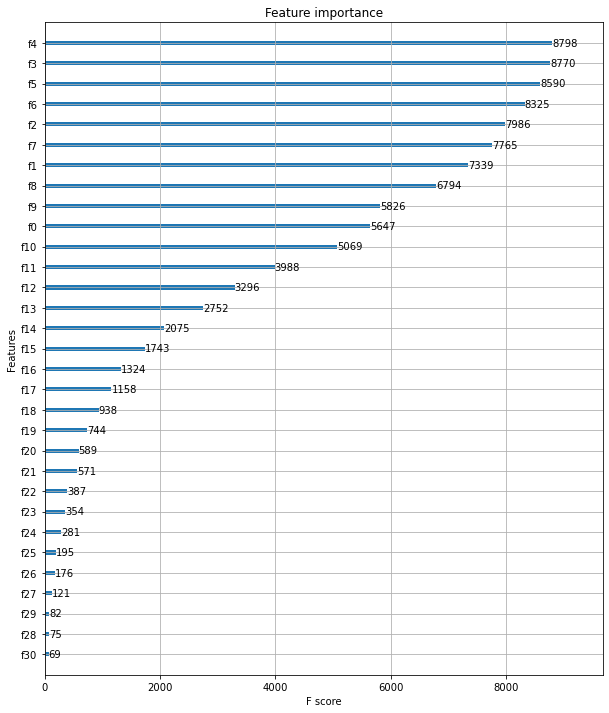

In [17]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig ,ax = plt.subplots(figsize=(10,12))
plot_importance(bst,ax=ax)
plt.show()

In [18]:
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
output = pd.DataFrame({'test_id': test_id_data, 'is_duplicate': test_predict})
output.to_csv(DATA_OUT_PATH + 'simple_xgb.csv', index=False)